# KOH Etch Rates
## Xavier Capaldi

All data was extracted from the plots provided by the BYU Integrated Microfabrication Lab: https://cleanroom.byu.edu/koh
Points were extracted using Gimp and as such, the accuracy was limited by the resolution of the plots.

Each material was tested with KOH concentrations ranging from 20% to 60% in 5% steps.
At each concentration the temperature was varied from 20 C to 100 C in 10 C steps.

In [11]:
%matplotlib inline

### System information

In [12]:
import platform
print(platform.platform())

Linux-5.7.12-200.fc32.x86_64-x86_64-with-glibc2.2.5


### Python version

In [13]:
import sys
print('Python ' + sys.version)

Python 3.8.5 (default, Jul 31 2020, 00:00:00) 
[GCC 10.2.1 20200723 (Red Hat 10.2.1-1)]


### Dependencies

In [14]:
! pip freeze

argon2-cffi==20.1.0
attrs==20.1.0
backcall==0.2.0
bleach==3.1.5
certifi==2020.6.20
cffi==1.14.2
chardet==3.0.4
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
idna==2.10
ipykernel==5.3.4
ipython==7.17.0
ipython-genutils==0.2.0
jedi==0.17.2
Jinja2==2.11.2
json5==0.9.5
jsonschema==3.2.0
jupyter-client==6.1.6
jupyter-core==4.6.3
jupyterlab==2.2.5
jupyterlab-server==1.2.0
kiwisolver==1.2.0
MarkupSafe==1.1.1
matplotlib==3.3.1
mistune==0.8.4
nbconvert==5.6.1
nbformat==5.0.7
notebook==6.1.3
numpy==1.19.1
packaging==20.4
pandocfilters==1.4.2
parso==0.7.1
pexpect==4.8.0
pickleshare==0.7.5
Pillow==7.2.0
prometheus-client==0.8.0
prompt-toolkit==3.0.6
ptyprocess==0.6.0
pycparser==2.20
Pygments==2.6.1
pyparsing==2.4.7
pyrsistent==0.16.0
python-dateutil==2.8.1
pyzmq==19.0.2
requests==2.24.0
scipy==1.5.2
Send2Trash==1.5.0
six==1.15.0
terminado==0.8.3
testpath==0.4.4
tornado==6.0.4
traitlets==4.3.3
urllib3==1.25.10
wcwidth==0.2.5
webencodings==0.5.1


### Import statements

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Pixel coordinates from plots
The pixel coordinates were extracted using Gimp.

In [16]:
si_100 = [[389, 386, 382, 373, 357, 330, 284, 206, 84],
          [389, 386, 382, 374, 358, 333, 286, 211, 93],
          [389, 387, 384, 375, 360, 335, 292, 222, 111],
          [390, 388, 383, 376, 363, 341, 301, 237, 135],
          [390, 388, 385, 378, 366, 346, 311, 254, 162],
          [389, 388, 383, 375, 360, 336, 293, 222, 110],
          [390, 388, 385, 378, 366, 345, 309, 250, 158],
          [390, 388, 383, 377, 363, 338, 301, 237, 132],
          [390, 388, 385, 377, 366, 344, 307, 245, 148]]

In [17]:
si_110 = [[389, 386, 384, 374, 359, 333, 287, 212, 93],
          [389, 388, 384, 375, 360, 334, 291, 218, 101],
          [390, 388, 384, 377, 362, 338, 296, 228, 119],
          [389, 386, 382, 375, 359, 330, 284, 206, 83],
          [390, 388, 384, 375, 362, 337, 297, 227, 118],
          [390, 388, 385, 378, 366, 345, 310, 250, 155],
          [390, 388, 384, 375, 360, 336, 293, 222, 109],
          [389, 388, 384, 375, 360, 336, 291, 220, 104],
          [389, 386, 382, 375, 358, 331, 286, 211, 90]]

In [18]:
si_o2 = [[391, 390, 389, 386, 378, 360, 322, 242, 79],
         [391, 390, 390, 387, 381, 366, 344, 267, 136],
         [391, 391, 389, 386, 378, 360, 340, 245, 87],
         [391, 390, 389, 386, 378, 360, 334, 244, 84],
         [391, 390, 389, 387, 378, 363, 328, 255, 108],
         [391, 390, 389, 387, 379, 360, 310, 245, 88],
         [391, 390, 389, 387, 380, 364, 311, 260, 120],
         [391, 390, 389, 387, 378, 362, 313, 253, 104],
         [391, 390, 389, 387, 378, 363, 327, 253, 106]]


### Annotation details for each material

In [19]:
si_100_units = 'microns/hour'
si_100_range = (0,25)
si_100_pixelrange = [(391, 360),
                     (391, 360),
                     (391, 360),
                     (391, 360),
                     (391, 360),
                     (391, 346),
                     (391, 346),
                     (391, 329),
                     (391, 314)]

In [20]:
si_110_units = 'microns/hour'
si_110_range = (0,25)
si_110_pixelrange = [(391, 372),
                     (391, 372),
                     (391, 372),
                     (391, 368),
                     (391, 368),
                     (391, 368),
                     (391, 356),
                     (391, 346),
                     (391, 329)]

In [21]:
si_o2_units = 'nanometers/hour'
si_o2_range = (0,100)
si_o2_pixelrange = [(391, 365),
                     (391, 374),
                     (391, 375),
                     (391, 375),
                     (391, 375),
                     (391, 373),
                     (391, 373),
                     (391, 369),
                     (391, 365)]


### Calculate pixel scales
Each plot has a slightly different pixel scale that needs to be determined in unit/pixel.

In [22]:
def find_scale(unit_range, pixel_range):
    """Calculate a conversion between pixel and etch rate, return unit/px."""

    pixels = pixel_range[0]-pixel_range[1]
    return (unit_range[1]-unit_range[0])/pixels

In [23]:
si_100_scale = [0]*9
si_110_scale = [0]*9
si_o2_scale = [0]*9

for p, pix_range in enumerate(si_100_pixelrange):
    si_100_scale[p] = find_scale(si_100_range, pix_range)

for p, pix_range in enumerate(si_110_pixelrange):
    si_110_scale[p] = find_scale(si_110_range, pix_range)

for p, pix_range in enumerate(si_o2_pixelrange):
    si_o2_scale[p] = find_scale(si_o2_range, pix_range)

### Rescale data from plots
With the pixel scales we can convert all the data from the plots into real rate data.

In [24]:
def rescale(scale, zero, pix_values):
    """Given a list of pixel values, rescale and convert to unit values."""

    r_values = [0]*9
    
    for i, val in enumerate(pix_values):
        r_values[i] = round((zero - val) * scale, 2)

    return r_values

In [25]:
# now convert pixel data to actual units
for i,values in enumerate(si_100):
    si_100[i] = rescale(si_100_scale[i], si_100_pixelrange[i][0], values)

for i,values in enumerate(si_110):
    si_110[i] = rescale(si_110_scale[i], si_110_pixelrange[i][0], values)

for i,values in enumerate(si_o2):
    si_o2[i] = rescale(si_o2_scale[i], si_o2_pixelrange[i][0], values)

Now everything has been rescaled and converted.
We can set our x and z axes:

In [27]:
temperature = [20, 30, 40, 50, 60, 70, 80, 90, 100]
concentration = [20, 25, 30, 35, 40, 45, 50, 55, 60]

Data should fit an exponential function so we define one for fitting:

In [28]:
def exponential(x, a, b):
    return a*np.exp(b*x)

### Fit exponential data

In [59]:
si_100_pars = [0]*9
si_100_cov = [0]*9
si_110_pars = [0]*9
si_110_cov = [0]*9
si_o2_pars = [0]*9
si_o2_cov = [0]*9

In [62]:
for i, rates in enumerate(si_100):
    si_100_pars[i], si_100_cov[i] = curve_fit(f=exponential, xdata=temperature, ydata=rates, p0=[0, 0], bounds=(-np.inf, np.inf))

for i, rates in enumerate(si_110):
    si_110_pars[i], si_110_cov[i] = curve_fit(f=exponential, xdata=temperature, ydata=rates, p0=[0, 0], bounds=(-np.inf, np.inf))

for i, rates in enumerate(si_o2):
    si_o2_pars[i], si_o2_cov[i] = curve_fit(f=exponential, xdata=temperature, ydata=rates, p0=[0, 0], bounds=(-np.inf, np.inf))

### Standard deviation of parameters (square roots of the diagonal of the covariance) and residuals

In [72]:
si_100_stdevs = [0]*9
si_100_fit = [0]*9
si_100_res = [0]*9
si_110_stdevs = [0]*9
si_110_fit = [0]*9
si_110_res = [0]*9
si_o2_stdevs = [0]*9
si_o2_fit = [0]*9
si_o2_res = [0]*9

In [83]:
for i, rates in enumerate(si_100):
    si_100_stdevs[i] = np.sqrt(np.diag(si_100_cov[i]))
    si_100_fit[i] = [exponential(t, *si_100_pars[i]) for t in temperature]
    si_100_res[i] = [r-si_100_fit[i][j] for j, r in enumerate(rates)]
    
for i, rates in enumerate(si_110):
    si_110_stdevs[i] = np.sqrt(np.diag(si_110_cov[i]))
    si_110_fit[i] = [exponential(t, *si_110_pars[i]) for t in temperature]
    si_110_res[i] = [r-si_110_fit[i][j] for j, r in enumerate(rates)]
    
for i, rates in enumerate(si_o2):
    si_o2_stdevs[i] = np.sqrt(np.diag(si_o2_cov[i]))
    si_o2_fit[i] = [exponential(t, *si_o2_pars[i]) for t in temperature]
    si_o2_res[i] = [r-si_o2_fit[i][j] for j, r in enumerate(rates)]

### Check the fits

#### Si 100

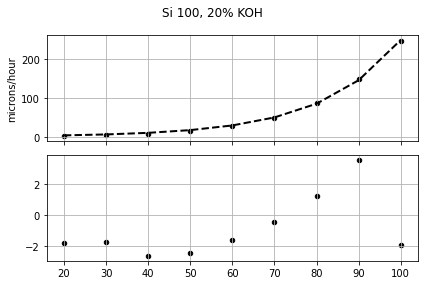

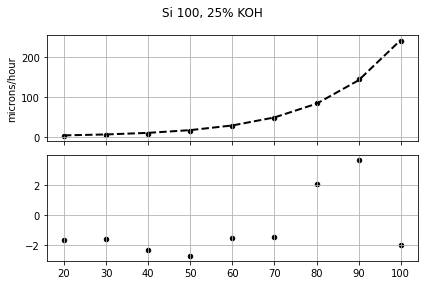

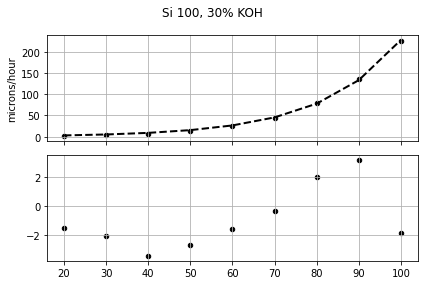

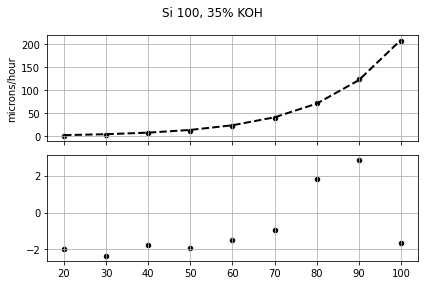

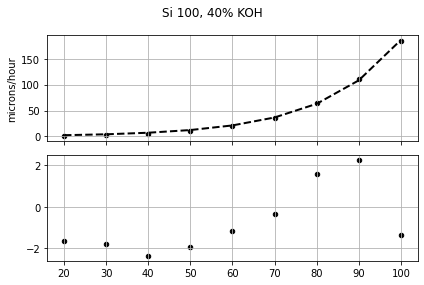

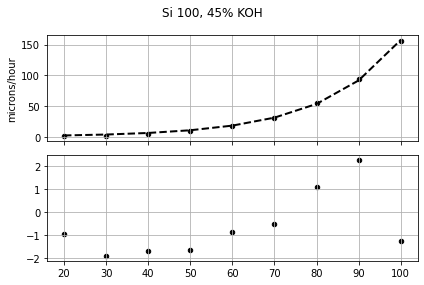

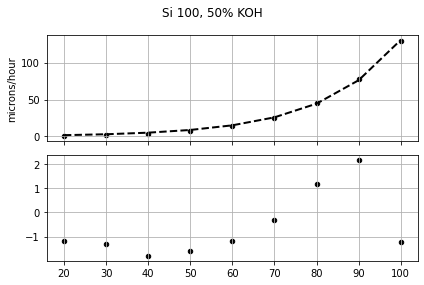

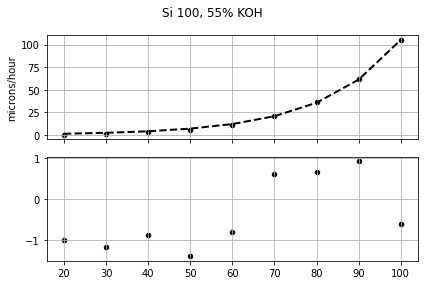

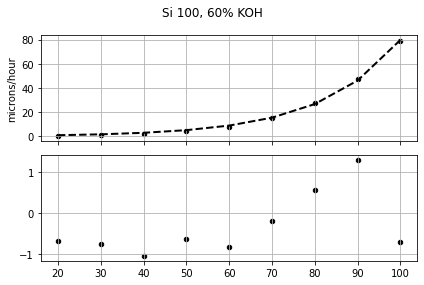

In [87]:
for i, rates in enumerate(si_100):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Si 100, {(i*5)+20}% KOH')
    ax1.scatter(temperature, rates, s=20, color='#000000', label="data")
    ax1.plot(temperature, si_100_fit[i], linestyle='--', linewidth=2, color='black')
    ax2.scatter(temperature, si_100_res[i], s=20, color='#000000', label="residuals")
    #ax1.set_yscale('log')
    ax1.grid(True)
    ax1.set_ylabel("microns/hour")
    ax2.grid(True)
    fig.tight_layout()

    plt.show()

#### Si 110

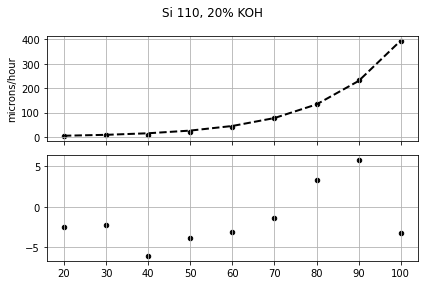

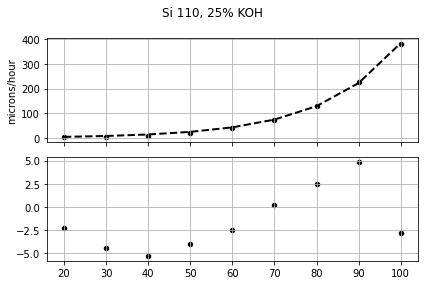

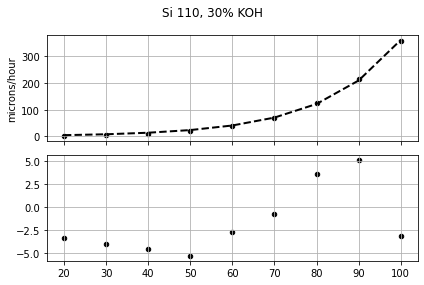

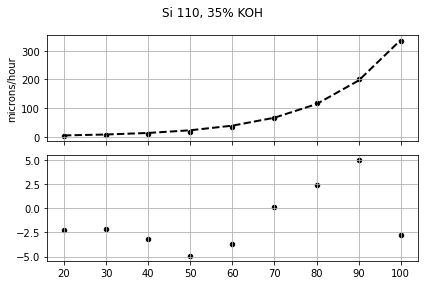

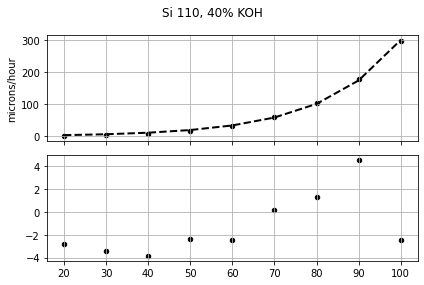

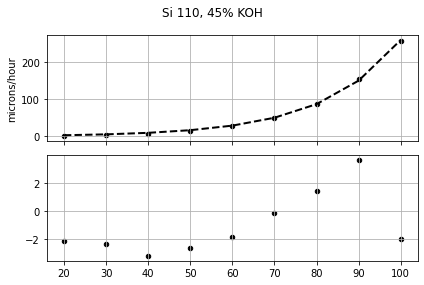

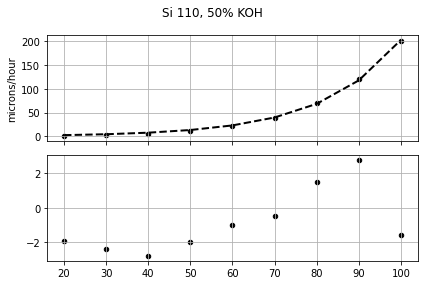

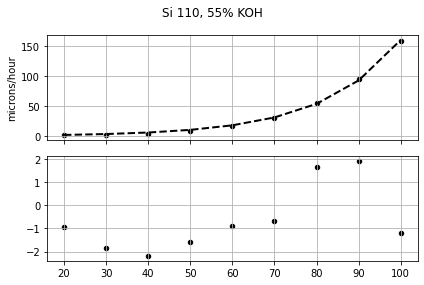

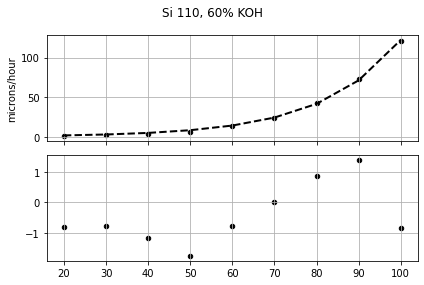

In [88]:
for i, rates in enumerate(si_110):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Si 110, {(i*5)+20}% KOH')
    ax1.scatter(temperature, rates, s=20, color='#000000', label="data")
    ax1.plot(temperature, si_110_fit[i], linestyle='--', linewidth=2, color='black')
    ax2.scatter(temperature, si_110_res[i], s=20, color='#000000', label="residuals")
    #ax1.set_yscale('log')
    ax1.grid(True)
    ax1.set_ylabel("microns/hour")
    ax2.grid(True)
    fig.tight_layout()

    plt.show()

#### SiO2

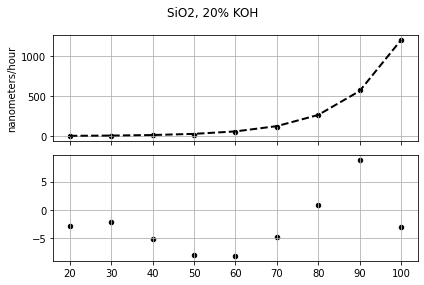

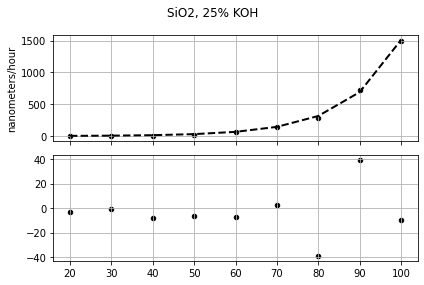

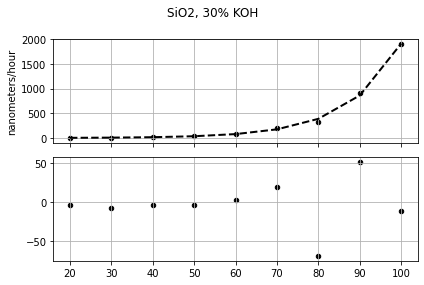

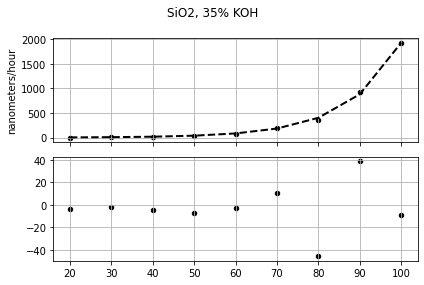

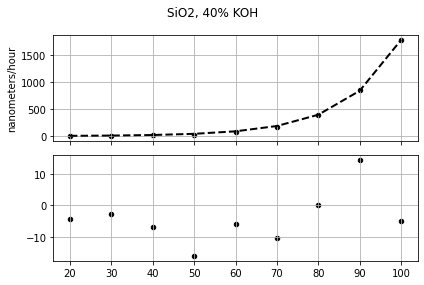

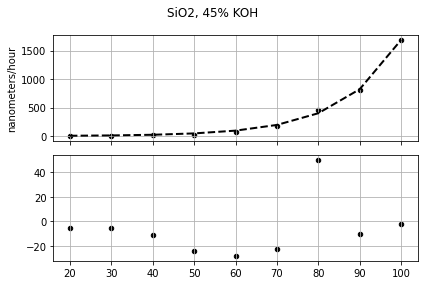

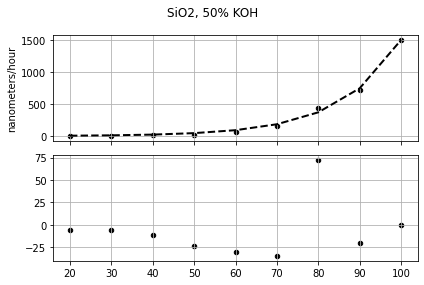

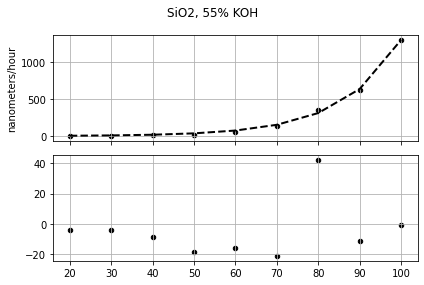

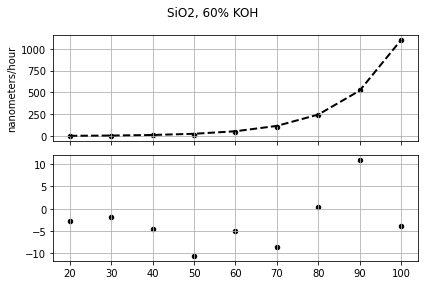

In [89]:
for i, rates in enumerate(si_o2):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'SiO2, {(i*5)+20}% KOH')
    ax1.scatter(temperature, rates, s=20, color='#000000', label="data")
    ax1.plot(temperature, si_o2_fit[i], linestyle='--', linewidth=2, color='black')
    ax2.scatter(temperature, si_o2_res[i], s=20, color='#000000', label="residuals")
    #ax1.set_yscale('log')
    ax1.grid(True)
    ax1.set_ylabel("nanometers/hour")
    ax2.grid(True)
    fig.tight_layout()

    plt.show()

Fits look good.

### Fitted parameters

Each element in the list represents a different KOH concentration.
The first value is a and the second is b in the following exponential equation:

rate = a * exp(b * temperature)

With this result, we can write functions to calculate etch rates in Si 100, Si 110 and SiO2 for temperatures ranging from 20 C to 100 C and for concentrations ranging from 20% to 60% KOH.

In [95]:
si_100_pars

[array([1.14841169, 0.05380941]),
 array([1.11669074, 0.0537997 ]),
 array([1.06355582, 0.05366365]),
 array([0.94618416, 0.05393288]),
 array([0.82590772, 0.0541723 ]),
 array([0.70513615, 0.05407911]),
 array([0.59237235, 0.05396245]),
 array([0.47217685, 0.05404856]),
 array([0.33815615, 0.05461262])]

In [96]:
si_110_pars

[array([1.74307835, 0.05424069]),
 array([1.64149062, 0.05456073]),
 array([1.55576454, 0.05446794]),
 array([1.47684319, 0.05431875]),
 array([1.30315911, 0.05436177]),
 array([1.09097436, 0.05467834]),
 array([0.88819885, 0.05431859]),
 array([0.68558588, 0.05456556]),
 array([0.55017811, 0.05403184])]

In [97]:
si_o2_pars

[array([0.61932724, 0.07571817]),
 array([0.60257424, 0.07826088]),
 array([0.65843023, 0.07973229]),
 array([0.75957035, 0.07838994]),
 array([0.9532963 , 0.07528702]),
 array([1.27034857, 0.07190373]),
 array([1.38564764, 0.06991053]),
 array([1.02666233, 0.07147684]),
 array([0.61204953, 0.07493948])]